In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np # linear algebra
import pandas as pd # data processing
from pathlib import Path
import matplotlib.pyplot as plt # import matplotlib
%matplotlib inline
import seaborn as sns # seaborn data visualizer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [3]:
BASE_DIR = Path('../input/pima-indians-diabetes-database')


In [5]:
df = pd.read_csv('/content/diabetes.csv')

In [6]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

In [9]:
features_list = list(df.drop(columns='Outcome').columns)
columns = list(df.columns)
print(features_list)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [10]:
isnull = df.isnull().sum()
isnull

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dup = df.duplicated(subset=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
dup.value_counts()

False    768
Name: count, dtype: int64

In [12]:
df.drop_duplicates(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)

sdf = df.apply(standardize_var)
sdf_X = sdf[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
corr = np.array(sdf_X.corr())
corr_inv = np.linalg.inv(corr)

fit = ols('Outcome~Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age',data=sdf).fit()

variables = []
reg_coef = []
vif = []
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])

df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

df_res

,Variable,Estimate,VIF
0,Glucose,0.397688,1.298916
1,BloodPressure,-0.092481,1.181550
2,SkinThickness,0.005585,1.507421
3,Insulin,-0.050649,1.424197
4,BMI,0.220032,1.297367
5,DiabetesPedigreeFunction,0.095642,1.064108
6,Age,0.143028,1.172888


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: title={'center': 'Diabetes Correlation of Features'}>

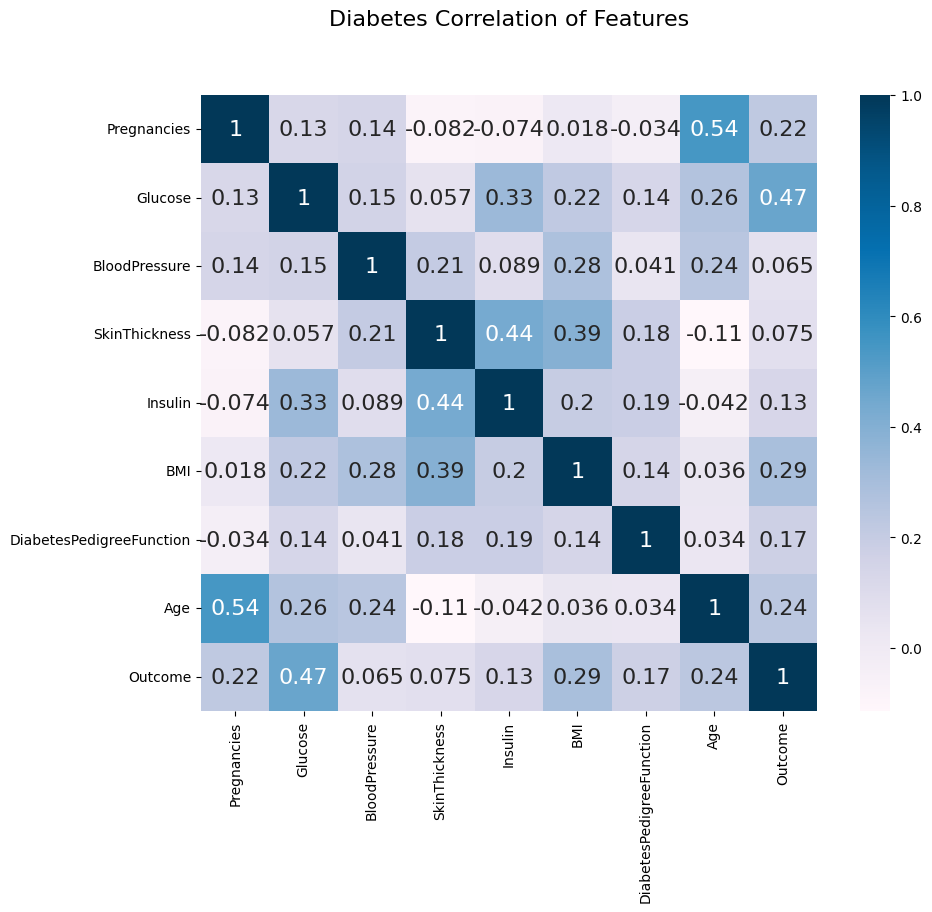

In [15]:
colormap = plt.cm.PuBu
plt.figure(figsize=(11, 8))
plt.title("Diabetes Correlation of Features", y = 1.1, size = 16)
sns.heatmap(df.astype(float).corr(), linewidths = 0.0, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True,annot_kws = {"size" : 16})

In [16]:
model2 = ols('Outcome ~ Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age', df).fit()
table2 = sm.stats.anova_lm(model2, type=2)
table2

,df,sum_sq,mean_sq,F,PR(>F)
Glucose,1.0,37.983801,37.983801,232.525439,5.272565e-46
BloodPressure,1.0,0.006706,0.006706,0.041054,8.394876e-01
SkinThickness,1.0,0.442541,0.442541,2.709104,1.001905e-01
Insulin,1.0,0.494055,0.494055,3.024454,8.242281e-02
BMI,1.0,6.708843,6.708843,41.069528,2.576181e-10
DiabetesPedigreeFunction,1.0,1.651513,1.651513,10.110069,1.534422e-03
Age,1.0,3.043190,3.043190,18.629494,1.797405e-05
Residual,760.0,124.148517,0.163353,NaN,NaN


In [17]:
df2 = table2[table2['PR(>F)'] < 0.05]
df2

,df,sum_sq,mean_sq,F,PR(>F)
Glucose,1.0,37.983801,37.983801,232.525439,5.272565e-46
BMI,1.0,6.708843,6.708843,41.069528,2.576181e-10
DiabetesPedigreeFunction,1.0,1.651513,1.651513,10.110069,1.534422e-03
Age,1.0,3.043190,3.043190,18.629494,1.797405e-05


In [18]:
features = df[['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']]
Y = df['Outcome']
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(features, Y)


In [20]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [21]:
accuracy={}

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_features, train_labels)

LinearRegression()

In [23]:
accuracy["Lin R"]=model.score(train_features, train_labels)
print("LinearRegression:",model.score(train_features, train_labels))

LinearRegression: 0.2541633027824285


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [25]:
accuracy["Log R"]=model.score(train_features, train_labels)
print("LinearRegression:",model.score(train_features, train_labels))

LinearRegression: 0.7673611111111112


In [26]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(train_features, train_labels, sample_weight=None)

Ridge()

In [27]:
print("ridge_regression",model.score(train_features, train_labels))

ridge_regression 0.25416271362145826


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_features, train_labels)

KNeighborsClassifier()

In [29]:
accuracy["KNN"]=model.score(train_features, train_labels)
print("K Nearest Neighbors:",model.score(train_features, train_labels))

K Nearest Neighbors: 0.8020833333333334


In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model.fit(train_features, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [31]:
accuracy["DTree"]=model.score(train_features, train_labels)
print("Decision Tree:",model.score(train_features, train_labels))

Decision Tree: 0.8246527777777778


In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_features, train_labels)

GaussianNB()

In [33]:
accuracy["NB"]=model.score(train_features, train_labels)
print("Naïve Bayes:",model.score(train_features, train_labels))

Naïve Bayes: 0.7604166666666666


In [34]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(train_features, train_labels)

RandomForestRegressor()

In [35]:
accuracy["RF"]=model.score(train_features, train_labels)
print("Random Forest:",model.score(train_features, train_labels))

Random Forest: 0.890704047761194


In [36]:
accuracy

{'Lin R': 0.2541633027824285,
 'Log R': 0.7673611111111112,
 'KNN': 0.8020833333333334,
 'DTree': 0.8246527777777778,
 'NB': 0.7604166666666666,
 'RF': 0.890704047761194}

<BarContainer object of 6 artists>

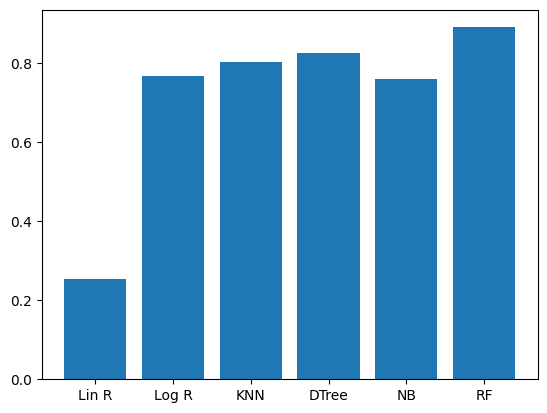

In [37]:
import matplotlib.pyplot as plt
algo=list(accuracy.keys())
accu=list(accuracy.values())
plt.bar(range(len(accuracy)),accu,tick_label=algo)

In [38]:
def random_forest(l):
  train_features, test_features, train_labels, test_labels = train_test_split(features, Y)
  train_features.iloc[-1]=l
  model=RandomForestRegressor()
  model.fit(train_features, train_labels)
  predicted_value=model.predict(train_features)
  return predicted_value[-1]

In [46]:
user_input=[]
for i in features:
 print("Enter the value of ",i,":")
 user_input+=[float(input())]
phone_number=''
while(len(phone_number)!=10):
    phone_number=input('Enter the whatsapp number:')
    try:
        n=int(phone_number)
    except:
        print("Enter phone number is not valid.")
    if (len(phone_number)!=10):
        print("Enter phone number is not valid.")

Enter the value of  Glucose :
148
Enter the value of  SkinThickness :
35
Enter the value of  BMI :
33.6
Enter the value of  DiabetesPedigreeFunction :
0.627
Enter the whatsapp number:6302795417


In [47]:
result =random_forest(user_input)
result

0.89

In [48]:
!pip install pywhatkit

In [50]:
import pywhatkit

KeyError: 'DISPLAY'

In [51]:
message=''
if(result<=0.25):
    message+="According to our prediction ,you have very less chances of getting diabetes.That is "+str(result*100)+"%. only.\n"
    message+="So we advice you to continue with your own diet.You have control over many of the factors that influence diabetes.\n"
elif(result<=0.5):
    message+="According to our prediction ,you have less chances of getting diabetes.That is "+str(result*100)+"%. only.\n"
    message+="Eating the right foods and adopting other lifestyle behaviors that promote healthy blood sugar and insulin levels will give you the best chance at avoiding diabetes in feature.\n"
elif(result<=0.75):
    message+="According to our prediction ,you have some chances of getting diabetes.That is "+str(result*100)+"%.\n"
    message+="So we recommend you to change your diet and daily activities to avoid diabetes.\n"
    message+="Cut Sugar and Refined Carbs From Your Diet.\n"
    message+="Drink Water as Your Primary Beverage.\n"
    message+="Follow a Very-Low-Carb Diet.\n"
    message+="Work Out Regularly,Lose Weight If You’re Overweight or Obese.\n"
    message+="Eating the right foods and adopting other lifestyle behaviors that promote healthy blood sugar and insulin levels will give you the best chance at avoiding diabetes in feature.\n"
else:
    message+="According to our prediction ,you have more chances of getting diabetes.That is "+str(result*100)+"%.\n"
    message+="So we strictly recommend you to meet a Diabetologist and maintain a strict diet to reduce the chances of getting diabetes.\n"
    message+="Minimizing processed food and focusing on whole food with protective effects on health may help decrease the risk of diabetes.\n"
    message+="Eat a High-Fiber Diet.\n"
    message+="Lose Weight If You’re Overweight or Obese.\n"
    message+="The herbs curcumin and berberine increase insulin sensitivity, reduce blood sugar levels and may help prevent diabetes.\n"
    message+="Rather than viewing prediabetes as a stepping stone to diabetes, it may be helpful to see it as a motivator for making changes that can help reduce your risk.\n"

In [52]:
from datetime import datetime
now = datetime.now()
time = now.strftime("%H:%M:%S")
h=int(time[0:2])
m=int(time[3:5])+2
print(h,m)

13 42


In [54]:
try:
 # sending message to receiver
 # using pywhatkit
 p="+91"+phone_number
 pywhatkit.sendwhatmsg(p,message,h,m)
 print("Successfully Sent!")
except:
 print("An Unexpected Error!")

An Unexpected Error!
